In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv


In [2]:
import warnings
warnings.simplefilter (action = 'ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
# Veriyi yükleme
df = pd.read_csv('/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv')

In [7]:
# Özellikleri seçme
# Burada sayısal özellikleri seçiyoruz. Kategorik özellikler uygun şekilde işlenmeli
numerical_features = df.select_dtypes(include=[np.number])

In [9]:
# Eksik verileri doldurma (örnek olarak, ortalama ile dolduruluyor)
numerical_features.fillna(numerical_features.mean(), inplace=True)

In [10]:
# Veriyi normalizasyon
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

In [11]:
# K-Means modelini oluşturma
kmeans = KMeans(n_clusters=5, random_state=42)  # Kümelerin sayısını belirleyin
kmeans.fit(scaled_features)

# Kümelere atama
df['Cluster'] = kmeans.labels_

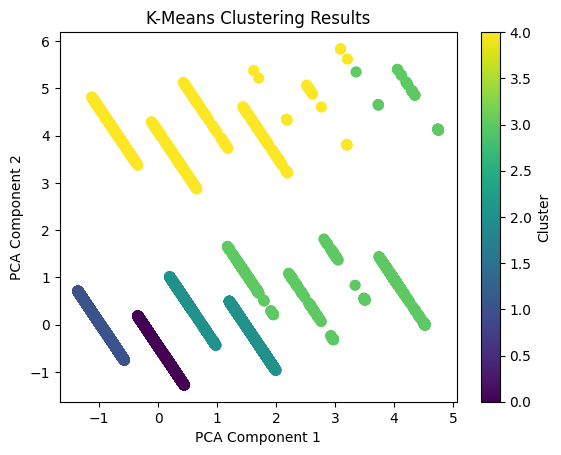

Küme Merkezleri:
[[ 0.0531269  -0.2117067   0.50733023 -0.98357998 -0.22560864]
 [-0.05491301 -0.2117067   0.50733023  1.01669414 -0.22560864]
 [-0.06601177 -0.2117067  -1.97110271 -0.43340233 -0.22560864]
 [ 0.36852732  0.02274568 -1.19990386 -0.40867934  4.43245432]
 [-0.04820264  4.72351603  0.00959817  0.14449758 -0.0718349 ]]


In [12]:
# Küme merkezlerini görselleştirme
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

# Küme merkezlerini yazdırma
print("Küme Merkezleri:")
print(kmeans.cluster_centers_)